In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
# Load digits dataset
digits = load_digits()
X = digits.data        # already flattened (1797 samples, 64 features)
y = digits.target

print(X.shape, y.shape)


(1797, 64) (1797,)


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
components = [2, 10, 30, 50]
explained_variances = {}

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances[n] = np.sum(pca.explained_variance_ratio_)


In [5]:
for k, v in explained_variances.items():
    print(f"PCA Components: {k}, Explained Variance: {v:.4f}")


PCA Components: 2, Explained Variance: 0.2159
PCA Components: 10, Explained Variance: 0.5887
PCA Components: 30, Explained Variance: 0.8932
PCA Components: 50, Explained Variance: 0.9828


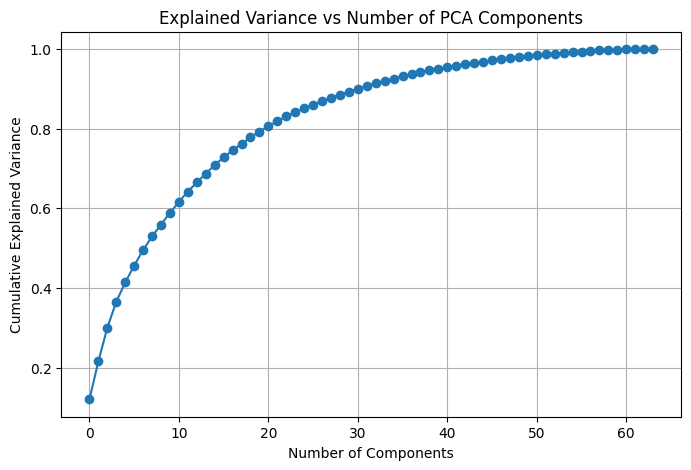

In [6]:
pca_full = PCA()
pca_full.fit(X_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of PCA Components")
plt.grid()
plt.show()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [8]:
lr_original = LogisticRegression(max_iter=3000)
lr_original.fit(X_train, y_train)

y_pred_original = lr_original.predict(X_test)
original_acc = accuracy_score(y_test, y_pred_original)

print("Original Accuracy:", original_acc)


Original Accuracy: 0.9722222222222222


In [9]:
pca_30 = PCA(n_components=30)
X_pca = pca_30.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

lr_pca = LogisticRegression(max_iter=3000)
lr_pca.fit(X_train_pca, y_train)

y_pred_pca = lr_pca.predict(X_test_pca)
pca_acc = accuracy_score(y_test, y_pred_pca)

print("PCA Accuracy (30 components):", pca_acc)


PCA Accuracy (30 components): 0.9611111111111111


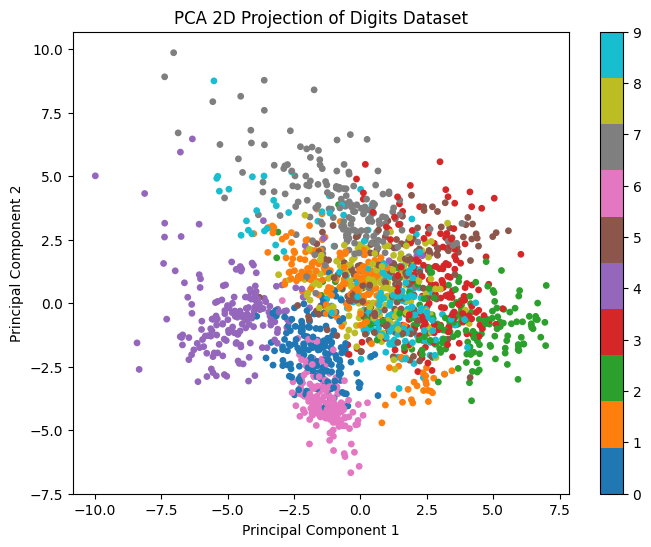

In [10]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca_2[:,0],
    X_pca_2[:,1],
    c=y,
    cmap="tab10",
    s=15
)
plt.colorbar(scatter)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Projection of Digits Dataset")
plt.show()
